# Elementárne signály

Pre matematickú reprezentáciu spracovania signálov v elektronických systémoch potrebujeme často previesť všeobecný signál do vhodného tvaru, v ktorom je matematický popis jednoduchší a zrozumiteľnejší. Ľubovolný, v čase spojitý signál, vieme rozložit do postupnosti vhodných elementárnych signálov, tieto môžu mať rozny tvar a formu.

Príkladom môže byť signál na výstupe vzorkovacieho obvodu, tento si vieme predstaviť ako superpozíciu skokov napätia v definovaných časových intervaloch

<img src="img/signal_6.png" width=350>

alebo aj ako postupnosť pravoúhlych napäťových impulzov s konštantnou šírkou a s rôznou amplitúdou

<img src="img/signal_7.png" width=350>

Elementárne signály majú zvyčajne jednoduchý matematický tvar, ale nie sú zvyčajne spojitými funkciami času alebo majú nespojité derivácie, v literatúre bývajú označované aj ako *singulárne funkcie*. 

### Jednotkový skok

Elementárnym singulárnym signálom je signál jednotkového skoku (*unit step function*), niekedy označovaný aj ako funkcia zopnutia. Reprezentuje zmenu signálu z hodnoty 0 na hodnotu 1.

\begin{equation}
\sigma(t)=\begin{cases}1 & t >  0\\0.5 & t = 0 \\0 & t < 0\end{cases}
\end{equation}

Niekedy je vhodné použiť pri numerických simuláciách (napríklad výpočet výkonových strát v spínacích obvodoch) aj spojitú reprezentáciu jednotkov0ho skoku, jednou z možných reprezentácií je napríklad funkcia  

\begin{equation}
\sigma(t) = \lim_{n \rightarrow \infty} \frac{1}{1 + e^{-n t}}
\end{equation}

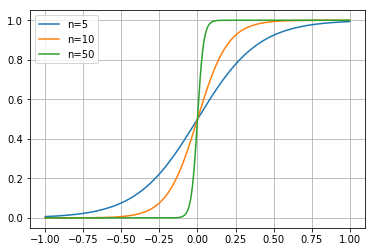

In [1]:
%reset -f  
%matplotlib inline
from scipy import *
import pylab as plt

# Numericka simulacia jednotkoveho skoku spojitou funkciou

t = linspace(-1,1,1000)
n = [5, 10, 50]

for q in n:
    s = 1.0/(1+exp(-q*t))
    plt.plot(t,s, label='n='+str(q))
plt.grid()
plt.legend()
plt.show()

### Jednotková rampová funkcia

Elementárny signál reprezentujúci lineárne narastujúcu hodnotu (*ramp function*) je definovaný ako

\begin{equation}
r(t)=\begin{cases}t & t \geq  0\\0 & t < 0\end{cases}
\end{equation} 

a formálne platia vzťahy

\begin{equation}
r(t)= \int_{-\infty}^{t} \sigma(\xi) \, d \xi
\end{equation}

\begin{equation}
\sigma(t)= \frac{d \, r(t)}{dt} \quad t \neq 0
\end{equation}


Implementácia uvedených elementárnych funkcií je jednoduchá (v implementácii je zahrnutý aj posun v čase a zmena strmosti pri rampovej funkcii):

In [2]:
def step(t, t0=0):
    # t0 - time offset
    return 0.5*(sign(t-t0) + 1.0) 

def ramp(t, t0=0, k=1):
    # t0 - time offset
    # k  - slope
    return k*maximum(0, t-t0)

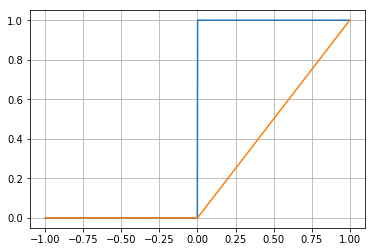

In [3]:
# Priklad pouzitia 
t = linspace(-1,1,1000)

plt.plot(t, step(t))
plt.plot(t, ramp(t))
plt.grid()
plt.show()

Ďaľšie elementárne signály odvodíme jednoduchým spôsobom z vyššie uvedených.

### Jednotkový impulz

Jednotkový impulz o dĺžke $t_d$ môžeme definovať ako

\begin{equation}
w(t)= \sigma(t + \frac{t_d}{2}) - \sigma(t - \frac{t_d}{2}) = \begin{cases}1 &  \big| \, t \, \big| <  \frac{t_d}{2}\\0.5 & \big| \, t \, \big| =  \frac{t_d}{2} \\ 0 & \big| \, t \, \big| >  \frac{t_d}{2}\end{cases}
\end{equation} 

In [4]:
def pulse(t, t0=0, td=1):
    return 0.5*(sign(t-t0+td/2.0) + sign(td/2.0 - t + t0))

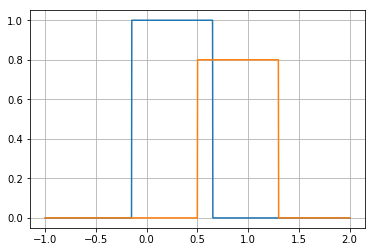

In [5]:
t = linspace(-1,2,1000)

width = 0.8
plt.plot(t, pulse(t, t0=0.25, td=width))                 # symetricky impulz o sirke width voci t0
plt.plot(t, 0.8*pulse(t, t0=0.5 + width/2, td=width))    # impuls so zaciatkom v t0 a dlzke width
plt.grid()
plt.show()

### Trojuholníkový impulz

Vhodnou kombináciou elementárnych funkcií vytvoríme trohulníkový impulz ako

\begin{equation}
v(t)= r(t + \frac{t_d}{2}) - 2 \, r(t)+ r(t - \frac{t_d}{2})
\end{equation}

In [6]:
def triangle(t, t0=0.0, td=1.0):
    return ramp(t- t0 + td/2 ) - 2 * ramp(t - t0 ) + ramp(t-t0 -td/2)

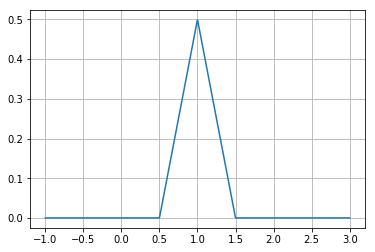

In [7]:
t = linspace(-1,3,1000)

plt.plot(t, triangle(t, t0 = 1, td=1.0))
plt.grid()
plt.show()

## Dynamické zobrazenie signálov

Pomocou vyššie definovaných elementárnych signálov môžeme zobraziť ľubovolný spojitý signál ako súčet časovo posunutých skokov s meniacou sa amplitúdou.

Nech $\{ \Delta, 2\Delta, 3\Delta, \dots  \}$ je postupnosť časových okamžikov a  $\{s_1, s_2, s_3, \dots  \}$ sú hodnoty signálu $s(t)$ v týchto okamžikoch. Nech $s_0 = s(0)$ je počiatočná hodnota signálu.

<img src="img/signal_5.png" width=550>

Potom si môžeme približne signál predstaviť ako súčet skokov s amplitúdou rovnou rozdielu hodnôt signálu v aktuálnom a predchádzajúcom skoku.

\begin{equation}
s(t)  \approx  s_0 \, \sigma(t) + (s_1 - s_0) \, \sigma(t - \Delta) + (s_2 - s_1) \, \sigma(t - 2\, \Delta) + \dots = \\
 = s_0 \, \sigma(t) + \sum_{k=1}^{\infty} (s_k - s_{k-1}) \, \sigma(t - k \Delta)
\end{equation}

V limitnom prípade, ak sa dľžka časového intevalu medzi dvoma vzorkami signálu bude blížiť k nule, sumu môžeme prepásať do integrálneho tvaru.

\begin{equation}
s(t)  = s_0 \, \sigma(t) + \int_{0}^{\infty} \frac{d s}{d \tau} \, \sigma(t -\tau) \, d \tau
\end{equation}

## Špeciálne funkcie a signály v SciPy

Knižnica *scipy.scpecial* a *scipy.signal* obsahujú implementácie špeciálnych funkcií a signálov, použiteľných pre pre popis zložitejších signálov. V nasledujúcom je uvedených niekoľko príkladov.

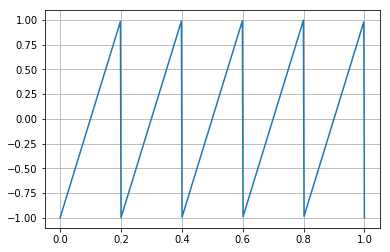

In [8]:
# Priklad - Signal piloviteho priebehu

from scipy import signal
t = linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * pi * 5 * t))
plt.grid()
plt.show()

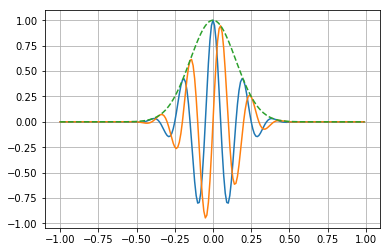

In [9]:
# Priklad - Signal s Gaussovskym priebehom

t = linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, i, t, q, t, e, '--')
plt.grid()
plt.show()

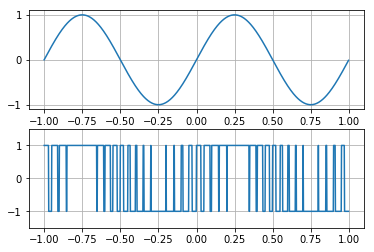

In [10]:
# Priklad - PWM signal

t = linspace(-1, 1, 1000, endpoint=False)

plt.figure()
sig = sin(2 * pi * t)
pwm = signal.square(2 * pi * 20 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)
plt.grid()

plt.show()